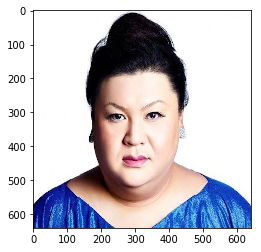

In [162]:
#coding:utf-8
import pylab
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import numpy as np


#Jupyterでインライン表示するための宣言
# %matplotlib inline

#追加

#画像の読み込み
im = Image.open("./Img/face1.jpg")
im = im.resize((640,640))
# print(im.size)

#画像をarrayに変換
im_list = np.asarray(im)
im_list.flags.writeable = True




# x,y = 10,10
# for i in range(0,100):
#     for j in range(0,100):
#         im_list[x+i,y+j] = [255,0,0]


#貼り付け
plt.imshow(im_list)

#表示
plt.show()


In [172]:
import math
N = 1000 #点の数
sigma = 1
v = np.zeros((N+1,2),dtype = 'int32')#ループのために2つ点を増やしている

for i in range(0,N+1):#初期輪郭点
    v[i,0] = int(160*math.cos(2*math.pi*i/N)+320)
    v[i,1] = int(160*math.sin(2*math.pi*i/N)+320)
    
    
def EpsLen(v):
    sum = 0
    for  i in range(0,N):
        dif_v = v[i]-v[i-1]
        sum += dif_v[0]**2+dif_v[1]**2
    return sum

def EpsCurv(v):
    sum = 0
    for  i in range(0,N):
        dif_v = v[i+1]- 2*v[i]-v[i-1]
        sum += dif_v[0]**2+dif_v[1]**2
    return sum

def EpsImg(v,lum):
    sum = 0
    for i in range(0,N):
        sum += Gauss(v[i],sigma)*lum[int(v[i,0]),int(v[i,1])]#たたみ込み
    return -sum

def Gauss(v,sigma):
    value = math.exp(-(v[0]**2+v[1]**2)/(2*sigma**2))/(2*math.pi*sigma**2)
    return value
    
def Eps(v,alpha,beta,gamma,lum):
    value = alpha*EpsLen(v)+beta*EpsCurv(v)+gamma*EpsImg(v,lum)
    return value
    

In [173]:
#画像の読み込み
im = Image.open("./Img/face1.jpg")
im = im.resize((640,640))
# グレースケールに変換
gray_im= im.convert('L')
lum = np.asarray(gray_im)

In [174]:
# d=0
n=10
eps_min = Eps(v,1,1,1,lum)
move_v = v
frag = 5#移動方向フラグ
#移動方向
#123
#4_6
#789


for loop in range(0,n):
    print(loop)
    d=0
    for i in range(0,N):#頂点iについてEps(v)を8つ計算する．
        #左上1
        move_v[i] = [v[i,0]-1,v[i,1]-1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 1
            eps_min =  Eps(move_v,1,1,1,lum)
        #上2
        move_v[i] = [v[i,0],v[i,1]-1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 2
            eps_min =  Eps(move_v,1,1,1,lum)
         #右上3
        move_v[i] = [v[i,0]+1,v[i,1]-1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 3
            eps_min =  Eps(move_v,1,1,1,lum)
        #左4
        move_v[i] = [v[i,0]-1,v[i,1]]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 4
            eps_min =  Eps(move_v,1,1,1,lum)
        #右6
        move_v[i] = [v[i,0]+1,v[i,1]]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 6
            eps_min =  Eps(move_v,1,1,1,lum)
        #左下7
        move_v[i] = [v[i,0]-1,v[i,1]+1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 7
            eps_min =  Eps(move_v,1,1,1,lum)
        #下8
        move_v[i] = [v[i,0],v[i,1]+1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 8
            eps_min =  Eps(move_v,1,1,1,lum)
        #右下9
        move_v[i] = [v[i,0]+1,v[i,1]+1]
        if eps_min> Eps(move_v,1,1,1,lum):
            frag = 9
            eps_min =  Eps(move_v,1,1,1,lum)
            
        #移動方向の決定
        if frag == 1:
            move_v[i] = [v[i,0]-1,v[i,1]-1]
            d +=1
        elif frag == 2:
            move_v[i] = [v[i,0],v[i,1]-1]
            d +=1
        elif frag == 3:
            move_v[i] = [v[i,0]+1,v[i,1]-1]
            d+=1
        elif frag == 4:
            move_v[i] = [v[i,0]-1,v[i,1]]
            d+=1
        elif frag == 6:
            move_v[i] = [v[i,0]+1,v[i,1]]
            d+=1
        elif frag == 7:
            move_v[i] = [v[i,0]-1,v[i,1]+1]
            d+=1
        elif frag == 8:
            move_v[i] = [v[i,0],v[i,1]+1]
            d+=1
        elif frag == 9:
            move_v[i] = [v[i,0]+1,v[i,1]+1]
            d+=1
        
        v = move_v
        eps_min = Eps(v,1,1,1,lum)
        


loop:0
loop:1
loop:2
loop:3
loop:4
loop:5
loop:6
loop:7
loop:8
loop:9
loop:10
loop:11
loop:12
loop:13
loop:14
loop:15
loop:16
loop:17
loop:18
loop:19
loop:20
loop:21
loop:22
loop:23
loop:24
loop:25
loop:26
loop:27
loop:28
loop:29
loop:30
loop:31
loop:32
loop:33
loop:34
loop:35
loop:36
loop:37
loop:38
loop:39
loop:40
loop:41
loop:42
loop:43
loop:44
loop:45
loop:46
loop:47
loop:48
loop:49
loop:50
loop:51
loop:52
loop:53
loop:54
loop:55
loop:56
loop:57
loop:58
loop:59
loop:60
loop:61
loop:62
loop:63
loop:64
loop:65
loop:66
loop:67
loop:68
loop:69
loop:70
loop:71
loop:72
loop:73
loop:74
loop:75
loop:76
loop:77
loop:78
loop:79
loop:80
loop:81
loop:82
loop:83
loop:84
loop:85
loop:86
loop:87
loop:88
loop:89
loop:90
loop:91
loop:92
loop:93
loop:94
loop:95
loop:96
loop:97
loop:98
loop:99
loop:100
loop:101
loop:102
loop:103
loop:104
loop:105
loop:106
loop:107
loop:108
loop:109
loop:110
loop:111
loop:112
loop:113
loop:114
loop:115
loop:116
loop:117
loop:118
loop:119
loop:120
loop:121
loop:122
loo

loop:923
loop:924
loop:925
loop:926
loop:927
loop:928
loop:929
loop:930
loop:931
loop:932
loop:933
loop:934
loop:935
loop:936
loop:937
loop:938
loop:939
loop:940
loop:941
loop:942
loop:943
loop:944
loop:945
loop:946
loop:947
loop:948
loop:949
loop:950
loop:951
loop:952
loop:953
loop:954
loop:955
loop:956
loop:957
loop:958
loop:959
loop:960
loop:961
loop:962
loop:963
loop:964
loop:965
loop:966
loop:967
loop:968
loop:969
loop:970
loop:971
loop:972
loop:973
loop:974
loop:975
loop:976
loop:977
loop:978
loop:979
loop:980
loop:981
loop:982
loop:983
loop:984
loop:985
loop:986
loop:987
loop:988
loop:989
loop:990
loop:991
loop:992
loop:993
loop:994
loop:995
loop:996
loop:997
loop:998
loop:999
loop:0
loop:1
loop:2
loop:3
loop:4
loop:5
loop:6
loop:7
loop:8
loop:9
loop:10
loop:11
loop:12
loop:13
loop:14
loop:15
loop:16
loop:17
loop:18
loop:19
loop:20
loop:21
loop:22
loop:23
loop:24
loop:25
loop:26
loop:27
loop:28
loop:29
loop:30
loop:31
loop:32
loop:33
loop:34
loop:35
loop:36
loop:37
loop:38
loop:

loop:846
loop:847
loop:848
loop:849
loop:850
loop:851
loop:852
loop:853
loop:854
loop:855
loop:856
loop:857
loop:858
loop:859
loop:860
loop:861
loop:862
loop:863
loop:864
loop:865
loop:866
loop:867
loop:868
loop:869
loop:870
loop:871
loop:872
loop:873
loop:874
loop:875
loop:876
loop:877
loop:878
loop:879
loop:880
loop:881
loop:882
loop:883
loop:884
loop:885
loop:886
loop:887
loop:888
loop:889
loop:890
loop:891
loop:892
loop:893
loop:894
loop:895
loop:896
loop:897
loop:898
loop:899
loop:900
loop:901
loop:902
loop:903
loop:904
loop:905
loop:906
loop:907
loop:908
loop:909
loop:910
loop:911
loop:912
loop:913
loop:914
loop:915
loop:916
loop:917
loop:918
loop:919
loop:920
loop:921
loop:922
loop:923
loop:924
loop:925
loop:926
loop:927
loop:928
loop:929
loop:930
loop:931
loop:932
loop:933
loop:934
loop:935
loop:936
loop:937
loop:938
loop:939
loop:940
loop:941
loop:942
loop:943
loop:944
loop:945
loop:946
loop:947
loop:948
loop:949
loop:950
loop:951
loop:952
loop:953
loop:954
loop:955
loop:956
l

loop:769
loop:770
loop:771
loop:772
loop:773
loop:774
loop:775
loop:776
loop:777
loop:778
loop:779
loop:780
loop:781
loop:782
loop:783
loop:784
loop:785
loop:786
loop:787
loop:788
loop:789
loop:790
loop:791
loop:792
loop:793
loop:794
loop:795
loop:796
loop:797
loop:798
loop:799
loop:800
loop:801
loop:802
loop:803
loop:804
loop:805
loop:806
loop:807
loop:808
loop:809
loop:810
loop:811
loop:812
loop:813
loop:814
loop:815
loop:816
loop:817
loop:818
loop:819
loop:820
loop:821
loop:822
loop:823
loop:824
loop:825
loop:826
loop:827
loop:828
loop:829
loop:830
loop:831
loop:832
loop:833
loop:834
loop:835
loop:836
loop:837
loop:838
loop:839
loop:840
loop:841
loop:842
loop:843
loop:844
loop:845
loop:846
loop:847
loop:848
loop:849
loop:850
loop:851
loop:852
loop:853
loop:854
loop:855
loop:856
loop:857
loop:858
loop:859
loop:860
loop:861
loop:862
loop:863
loop:864
loop:865
loop:866
loop:867
loop:868
loop:869
loop:870
loop:871
loop:872
loop:873
loop:874
loop:875
loop:876
loop:877
loop:878
loop:879
l

loop:692
loop:693
loop:694
loop:695
loop:696
loop:697
loop:698
loop:699
loop:700
loop:701
loop:702
loop:703
loop:704
loop:705
loop:706
loop:707
loop:708
loop:709
loop:710
loop:711
loop:712
loop:713
loop:714
loop:715
loop:716
loop:717
loop:718
loop:719
loop:720
loop:721
loop:722
loop:723
loop:724
loop:725
loop:726
loop:727
loop:728
loop:729
loop:730
loop:731
loop:732
loop:733
loop:734
loop:735
loop:736
loop:737
loop:738
loop:739
loop:740
loop:741
loop:742
loop:743
loop:744
loop:745
loop:746
loop:747
loop:748
loop:749
loop:750
loop:751
loop:752
loop:753
loop:754
loop:755
loop:756
loop:757
loop:758
loop:759
loop:760
loop:761
loop:762
loop:763
loop:764
loop:765
loop:766
loop:767
loop:768
loop:769
loop:770
loop:771
loop:772
loop:773
loop:774
loop:775
loop:776
loop:777
loop:778
loop:779
loop:780
loop:781
loop:782
loop:783
loop:784
loop:785
loop:786
loop:787
loop:788
loop:789
loop:790
loop:791
loop:792
loop:793
loop:794
loop:795
loop:796
loop:797
loop:798
loop:799
loop:800
loop:801
loop:802
l

loop:615
loop:616
loop:617
loop:618
loop:619
loop:620
loop:621
loop:622
loop:623
loop:624
loop:625
loop:626
loop:627
loop:628
loop:629
loop:630
loop:631
loop:632
loop:633
loop:634
loop:635
loop:636
loop:637
loop:638
loop:639
loop:640
loop:641
loop:642
loop:643
loop:644
loop:645
loop:646
loop:647
loop:648
loop:649
loop:650
loop:651
loop:652
loop:653
loop:654
loop:655
loop:656
loop:657
loop:658
loop:659
loop:660
loop:661
loop:662
loop:663
loop:664
loop:665
loop:666
loop:667
loop:668
loop:669
loop:670
loop:671
loop:672
loop:673
loop:674
loop:675
loop:676
loop:677
loop:678
loop:679
loop:680
loop:681
loop:682
loop:683
loop:684
loop:685
loop:686
loop:687
loop:688
loop:689
loop:690
loop:691
loop:692
loop:693
loop:694
loop:695
loop:696
loop:697
loop:698
loop:699
loop:700
loop:701
loop:702
loop:703
loop:704
loop:705
loop:706
loop:707
loop:708
loop:709
loop:710
loop:711
loop:712
loop:713
loop:714
loop:715
loop:716
loop:717
loop:718
loop:719
loop:720
loop:721
loop:722
loop:723
loop:724
loop:725
l

loop:538
loop:539
loop:540
loop:541
loop:542
loop:543
loop:544
loop:545
loop:546
loop:547
loop:548
loop:549
loop:550
loop:551
loop:552
loop:553
loop:554
loop:555
loop:556
loop:557
loop:558
loop:559
loop:560
loop:561
loop:562
loop:563
loop:564
loop:565
loop:566
loop:567
loop:568
loop:569
loop:570
loop:571
loop:572
loop:573
loop:574
loop:575
loop:576
loop:577
loop:578
loop:579
loop:580
loop:581
loop:582
loop:583
loop:584
loop:585
loop:586
loop:587
loop:588
loop:589
loop:590
loop:591
loop:592
loop:593
loop:594
loop:595
loop:596
loop:597
loop:598
loop:599
loop:600
loop:601
loop:602
loop:603
loop:604
loop:605
loop:606
loop:607
loop:608
loop:609
loop:610
loop:611
loop:612
loop:613
loop:614
loop:615
loop:616
loop:617
loop:618
loop:619
loop:620
loop:621
loop:622
loop:623
loop:624
loop:625
loop:626
loop:627
loop:628
loop:629
loop:630
loop:631
loop:632
loop:633
loop:634
loop:635
loop:636
loop:637
loop:638
loop:639
loop:640
loop:641
loop:642
loop:643
loop:644
loop:645
loop:646
loop:647
loop:648
l

loop:461
loop:462
loop:463
loop:464
loop:465
loop:466
loop:467
loop:468
loop:469
loop:470
loop:471
loop:472
loop:473
loop:474
loop:475
loop:476
loop:477
loop:478
loop:479
loop:480
loop:481
loop:482
loop:483
loop:484
loop:485
loop:486
loop:487
loop:488
loop:489
loop:490
loop:491
loop:492
loop:493
loop:494
loop:495
loop:496
loop:497
loop:498
loop:499
loop:500
loop:501
loop:502
loop:503
loop:504
loop:505
loop:506
loop:507
loop:508
loop:509
loop:510
loop:511
loop:512
loop:513
loop:514
loop:515
loop:516
loop:517
loop:518
loop:519
loop:520
loop:521
loop:522
loop:523
loop:524
loop:525
loop:526
loop:527
loop:528
loop:529
loop:530
loop:531
loop:532
loop:533
loop:534
loop:535
loop:536
loop:537
loop:538
loop:539
loop:540
loop:541
loop:542
loop:543
loop:544
loop:545
loop:546
loop:547
loop:548
loop:549
loop:550
loop:551
loop:552
loop:553
loop:554
loop:555
loop:556
loop:557
loop:558
loop:559
loop:560
loop:561
loop:562
loop:563
loop:564
loop:565
loop:566
loop:567
loop:568
loop:569
loop:570
loop:571
l

loop:384
loop:385
loop:386
loop:387
loop:388
loop:389
loop:390
loop:391
loop:392
loop:393
loop:394
loop:395
loop:396
loop:397
loop:398
loop:399
loop:400
loop:401
loop:402
loop:403
loop:404
loop:405
loop:406
loop:407
loop:408
loop:409
loop:410
loop:411
loop:412
loop:413
loop:414
loop:415
loop:416
loop:417
loop:418
loop:419
loop:420
loop:421
loop:422
loop:423
loop:424
loop:425
loop:426
loop:427
loop:428
loop:429
loop:430
loop:431
loop:432
loop:433
loop:434
loop:435
loop:436
loop:437
loop:438
loop:439
loop:440
loop:441
loop:442
loop:443
loop:444
loop:445
loop:446
loop:447
loop:448
loop:449
loop:450
loop:451
loop:452
loop:453
loop:454
loop:455
loop:456
loop:457
loop:458
loop:459
loop:460
loop:461
loop:462
loop:463
loop:464
loop:465
loop:466
loop:467
loop:468
loop:469
loop:470
loop:471
loop:472
loop:473
loop:474
loop:475
loop:476
loop:477
loop:478
loop:479
loop:480
loop:481
loop:482
loop:483
loop:484
loop:485
loop:486
loop:487
loop:488
loop:489
loop:490
loop:491
loop:492
loop:493
loop:494
l

loop:307
loop:308
loop:309
loop:310
loop:311
loop:312
loop:313
loop:314
loop:315
loop:316
loop:317
loop:318
loop:319
loop:320
loop:321
loop:322
loop:323
loop:324
loop:325
loop:326
loop:327
loop:328
loop:329
loop:330
loop:331
loop:332
loop:333
loop:334
loop:335
loop:336
loop:337
loop:338
loop:339
loop:340
loop:341
loop:342
loop:343
loop:344
loop:345
loop:346
loop:347
loop:348
loop:349
loop:350
loop:351
loop:352
loop:353
loop:354
loop:355
loop:356
loop:357
loop:358
loop:359
loop:360
loop:361
loop:362
loop:363
loop:364
loop:365
loop:366
loop:367
loop:368
loop:369
loop:370
loop:371
loop:372
loop:373
loop:374
loop:375
loop:376
loop:377
loop:378
loop:379
loop:380
loop:381
loop:382
loop:383
loop:384
loop:385
loop:386
loop:387
loop:388
loop:389
loop:390
loop:391
loop:392
loop:393
loop:394
loop:395
loop:396
loop:397
loop:398
loop:399
loop:400
loop:401
loop:402
loop:403
loop:404
loop:405
loop:406
loop:407
loop:408
loop:409
loop:410
loop:411
loop:412
loop:413
loop:414
loop:415
loop:416
loop:417
l

loop:230
loop:231
loop:232
loop:233
loop:234
loop:235
loop:236
loop:237
loop:238
loop:239
loop:240
loop:241
loop:242
loop:243
loop:244
loop:245
loop:246
loop:247
loop:248
loop:249
loop:250
loop:251
loop:252
loop:253
loop:254
loop:255
loop:256
loop:257
loop:258
loop:259
loop:260
loop:261
loop:262
loop:263
loop:264
loop:265
loop:266
loop:267
loop:268
loop:269
loop:270
loop:271
loop:272
loop:273
loop:274
loop:275
loop:276
loop:277
loop:278
loop:279
loop:280
loop:281
loop:282
loop:283
loop:284
loop:285
loop:286
loop:287
loop:288
loop:289
loop:290
loop:291
loop:292
loop:293
loop:294
loop:295
loop:296
loop:297
loop:298
loop:299
loop:300
loop:301
loop:302
loop:303
loop:304
loop:305
loop:306
loop:307
loop:308
loop:309
loop:310
loop:311
loop:312
loop:313
loop:314
loop:315
loop:316
loop:317
loop:318
loop:319
loop:320
loop:321
loop:322
loop:323
loop:324
loop:325
loop:326
loop:327
loop:328
loop:329
loop:330
loop:331
loop:332
loop:333
loop:334
loop:335
loop:336
loop:337
loop:338
loop:339
loop:340
l

In [175]:
#画像をarrayに変換
im_list = np.asarray(im)
im_list.flags.writeable = True

for i in range(0,N):
    im_list[int(v[i,0]),int(v[i,1])] = [255,0,0]


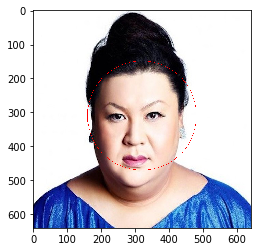

In [176]:
#貼り付け
plt.imshow(im_list)
#表示
plt.show()